# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS, France
- date   : Juin 16 2016


In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
print(theNotebook)

MakeLogBook


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [6]:
import pandas as pd

In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [8]:
rootpath_rawimage="../OverScanRemove/trim_images"
MIN_IMGNUMBER=58
MAX_IMGNUMBER=199
object_name='HD111980_May_30th'
SelectTagRe='^trim_20170530_([0-9]+).fits$' # regular expression to select the file
SearchTagRe='^trim_20170530_[0-9]+.fits$'
NBIMGPERLROW=4

In [9]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
#object_name='mucol'
infos='ctio30may2017'

In [10]:
logfile='logbk_'+object_name+'_'+infos+'.fits'
pandaslogfile='logbk_'+object_name+'_'+infos+'.csv'

In [11]:
dirlist=[]
dirlist.append(rootpath_rawimage)
dirlist_all=np.array(dirlist)

In [12]:
filelist_all=os.listdir(rootpath_rawimage) 

In [13]:
#dirlist_all.remove('.DS_Store') # reove that file in a mAC
filelist_all

['trim_20170530_058.fits',
 'trim_20170530_059.fits',
 'trim_20170530_060.fits',
 'trim_20170530_061.fits',
 'trim_20170530_062.fits',
 'trim_20170530_063.fits',
 'trim_20170530_064.fits',
 'trim_20170530_065.fits',
 'trim_20170530_066.fits',
 'trim_20170530_067.fits',
 'trim_20170530_068.fits',
 'trim_20170530_069.fits',
 'trim_20170530_070.fits',
 'trim_20170530_071.fits',
 'trim_20170530_072.fits',
 'trim_20170530_073.fits',
 'trim_20170530_074.fits',
 'trim_20170530_075.fits',
 'trim_20170530_076.fits',
 'trim_20170530_077.fits',
 'trim_20170530_078.fits',
 'trim_20170530_079.fits',
 'trim_20170530_080.fits',
 'trim_20170530_081.fits',
 'trim_20170530_082.fits',
 'trim_20170530_083.fits',
 'trim_20170530_084.fits',
 'trim_20170530_085.fits',
 'trim_20170530_086.fits',
 'trim_20170530_087.fits',
 'trim_20170530_088.fits',
 'trim_20170530_089.fits',
 'trim_20170530_090.fits',
 'trim_20170530_091.fits',
 'trim_20170530_092.fits',
 'trim_20170530_093.fits',
 'trim_20170530_094.fits',
 

In [14]:
indexes_files= [] # global list
filelist_fitsimages= []  # global list

In [15]:
def MakeFileList():
    """
    MakeFileList : Make The List of files to open
    =============
    
    - we select the files which are of interest.
    - In particular select the number range
    
    """
    count=0
    
    for dir in dirlist_all: # loop on directories, one per image   (if necessary)    
            dir_leaf= dir # build the name of leaf directory
            listfiles=os.listdir(dir_leaf) 
            for filename in listfiles:
                if re.search(SearchTagRe,filename):  #example of filename filter
                    str_index=re.findall(SelectTagRe,filename)
                    count=count+1
                    index=int(str_index[0])
                    if index >= MIN_IMGNUMBER and index <= MAX_IMGNUMBER: 
                        indexes_files.append(index)         
                        shortfilename=dir_leaf+'/'+filename
                        filelist_fitsimages.append(shortfilename)
                    
    return

In [16]:
MakeFileList()   # Make the list

In [17]:
indexes_files=np.array(indexes_files)
filelist_fitsimages=np.array(filelist_fitsimages)

In [18]:
indexes_files

array([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])

In [19]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes

In [20]:
sorted_files=filelist_fitsimages[sorted_indexes]

In [21]:
sorted_numbers=indexes_files[sorted_indexes]

In [22]:
sorted_filenames=[]
for file in sorted_files:
    #fullfilename=os.path.join(rootpath_rawimage,file)
    fullfilename=file
    sorted_filenames.append(fullfilename)

In [23]:
sorted_filenames=np.array(sorted_filenames)

In [24]:
sorted_filenames

array(['../OverScanRemove/trim_images/trim_20170530_058.fits',
       '../OverScanRemove/trim_images/trim_20170530_059.fits',
       '../OverScanRemove/trim_images/trim_20170530_060.fits',
       '../OverScanRemove/trim_images/trim_20170530_061.fits',
       '../OverScanRemove/trim_images/trim_20170530_062.fits',
       '../OverScanRemove/trim_images/trim_20170530_063.fits',
       '../OverScanRemove/trim_images/trim_20170530_064.fits',
       '../OverScanRemove/trim_images/trim_20170530_065.fits',
       '../OverScanRemove/trim_images/trim_20170530_066.fits',
       '../OverScanRemove/trim_images/trim_20170530_067.fits',
       '../OverScanRemove/trim_images/trim_20170530_068.fits',
       '../OverScanRemove/trim_images/trim_20170530_069.fits',
       '../OverScanRemove/trim_images/trim_20170530_070.fits',
       '../OverScanRemove/trim_images/trim_20170530_071.fits',
       '../OverScanRemove/trim_images/trim_20170530_072.fits',
       '../OverScanRemove/trim_images/trim_20170530_073

In [25]:
from astropy.io import fits
with fits.open(sorted_filenames[0]) as pf:
    (pf[0].header)

In [26]:
pf[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD11980 '           / Name of object observed                        
OBSERVER= '        '           / observer                                       
PROPID  = '        '           / Proposal ID                                    
RECID   = 'ct36.20170531.000218' / NOAO Archibe record ID                       
PROPID  = '        '           / Proposal ID                                    
IMAGETYP= 'object  '        

### Build tables for output file

In [27]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []
all_filter1 = []
all_filter2 = []

for idx,file in np.ndenumerate(sorted_filenames):  
    print file
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
   
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    filter1 = header['FILTER1']
    filter2 = header['FILTER2']
    
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)
    all_filter1.append(filter1)
    all_filter2.append(filter2)

    hdu_list.close()
    

../OverScanRemove/trim_images/trim_20170530_058.fits
../OverScanRemove/trim_images/trim_20170530_059.fits
../OverScanRemove/trim_images/trim_20170530_060.fits
../OverScanRemove/trim_images/trim_20170530_061.fits
../OverScanRemove/trim_images/trim_20170530_062.fits
../OverScanRemove/trim_images/trim_20170530_063.fits
../OverScanRemove/trim_images/trim_20170530_064.fits
../OverScanRemove/trim_images/trim_20170530_065.fits
../OverScanRemove/trim_images/trim_20170530_066.fits
../OverScanRemove/trim_images/trim_20170530_067.fits
../OverScanRemove/trim_images/trim_20170530_068.fits
../OverScanRemove/trim_images/trim_20170530_069.fits
../OverScanRemove/trim_images/trim_20170530_070.fits
../OverScanRemove/trim_images/trim_20170530_071.fits
../OverScanRemove/trim_images/trim_20170530_072.fits
../OverScanRemove/trim_images/trim_20170530_073.fits
../OverScanRemove/trim_images/trim_20170530_074.fits
../OverScanRemove/trim_images/trim_20170530_075.fits
../OverScanRemove/trim_images/trim_20170530_07

In [28]:
len(all_airmass)

142

In [29]:
all_filter1

['dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',
 'dia',


## Build outputfile

In [30]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(filelist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)
col_filter1=np.array(all_filter1)
col_filter2=np.array(all_filter2)

In [31]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=sorted_filenames)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 
c13 = fits.Column(name='filter1', format='A20', array=col_filter1)
c14 = fits.Column(name='filter2', format='A20', array=col_filter2) 

In [32]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12,c13,c14])

In [33]:
tbhdu.writeto(logfile,overwrite=True)

## Convert into Table
---------------------------

In [34]:
thetable= Table(tbhdu.data)

In [35]:
thetable.show_in_notebook()

idx,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2
0,58,1.051,2017-05-31T00:02:18.596,../OverScanRemove/trim_images/,60.0,17.969,9.3,783.0,26.0,5.5,0.94,dia,Thor300
1,59,1.049,2017-05-31T00:04:09.003,../OverScanRemove/trim_images/,10.0,17.608,9.2,783.0,26.0,4.6,1.006,dia,Thor300
2,60,1.047,2017-05-31T00:06:14.000,../OverScanRemove/trim_images/,60.0,17.255,9.1,783.0,26.0,5.7,1.018,dia,Ron400
3,61,1.045,2017-05-31T00:08:06.454,../OverScanRemove/trim_images/,60.0,16.942,9.2,783.0,26.0,5.5,0.939,dia,Thor300
4,62,1.044,2017-05-31T00:09:58.852,../OverScanRemove/trim_images/,60.0,16.634,9.1,783.0,26.0,5.8,0.846,dia,HoloPhP
5,63,1.042,2017-05-31T00:11:51.243,../OverScanRemove/trim_images/,120.0,16.332,8.9,783.0,26.0,5.4,0.83,dia,HoloPhAg
6,64,1.04,2017-05-31T00:14:43.647,../OverScanRemove/trim_images/,120.0,15.879,8.9,783.0,26.0,5.3,0.74,dia,HoloAmAg
7,65,1.037,2017-05-31T00:17:36.001,../OverScanRemove/trim_images/,60.0,15.441,8.8,783.0,26.0,5.4,0.771,dia,Ron400
8,66,1.036,2017-05-31T00:19:28.503,../OverScanRemove/trim_images/,60.0,15.163,8.8,783.0,26.0,4.8,0.715,dia,Thor300
9,67,1.035,2017-05-31T00:21:20.951,../OverScanRemove/trim_images/,60.0,14.892,8.7,783.0,26.0,4.6,0.954,dia,HoloPhP


## Read the logfile into a Table
---------------------------------------

In [36]:
t = Table.read(logfile)

In [37]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32,str20,str20
58,1.051,2017-05-31T00:02:18.596,../OverScanRemove/trim_images/,60.0,17.969,9.3,783.0,26.0,5.5,0.94,dia,Thor300
59,1.049,2017-05-31T00:04:09.003,../OverScanRemove/trim_images/,10.0,17.608,9.2,783.0,26.0,4.6,1.006,dia,Thor300
60,1.047,2017-05-31T00:06:14.000,../OverScanRemove/trim_images/,60.0,17.255,9.1,783.0,26.0,5.7,1.018,dia,Ron400
61,1.045,2017-05-31T00:08:06.454,../OverScanRemove/trim_images/,60.0,16.942,9.2,783.0,26.0,5.5,0.939,dia,Thor300
62,1.044,2017-05-31T00:09:58.852,../OverScanRemove/trim_images/,60.0,16.634,9.1,783.0,26.0,5.8,0.846,dia,HoloPhP
63,1.042,2017-05-31T00:11:51.243,../OverScanRemove/trim_images/,120.0,16.332,8.9,783.0,26.0,5.4,0.83,dia,HoloPhAg
64,1.04,2017-05-31T00:14:43.647,../OverScanRemove/trim_images/,120.0,15.879,8.9,783.0,26.0,5.3,0.74,dia,HoloAmAg
65,1.037,2017-05-31T00:17:36.001,../OverScanRemove/trim_images/,60.0,15.441,8.8,783.0,26.0,5.4,0.771,dia,Ron400
66,1.036,2017-05-31T00:19:28.503,../OverScanRemove/trim_images/,60.0,15.163,8.8,783.0,26.0,4.8,0.715,dia,Thor300


## Convert into pandas to plot
---------------------------------------

In [38]:
df = t.to_pandas()

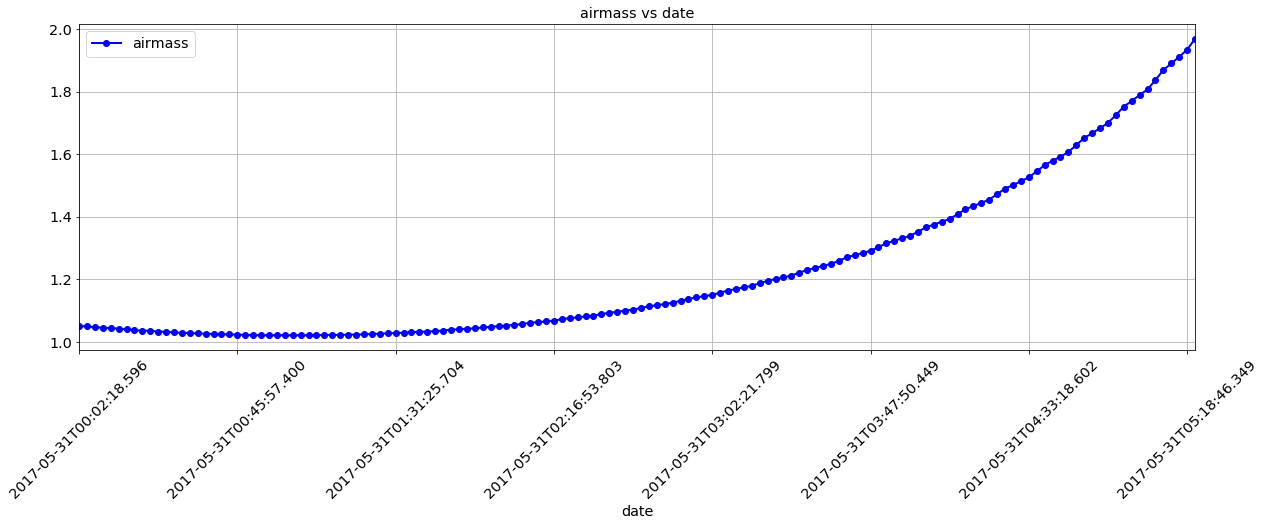

In [39]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',marker='o',linewidth=2)


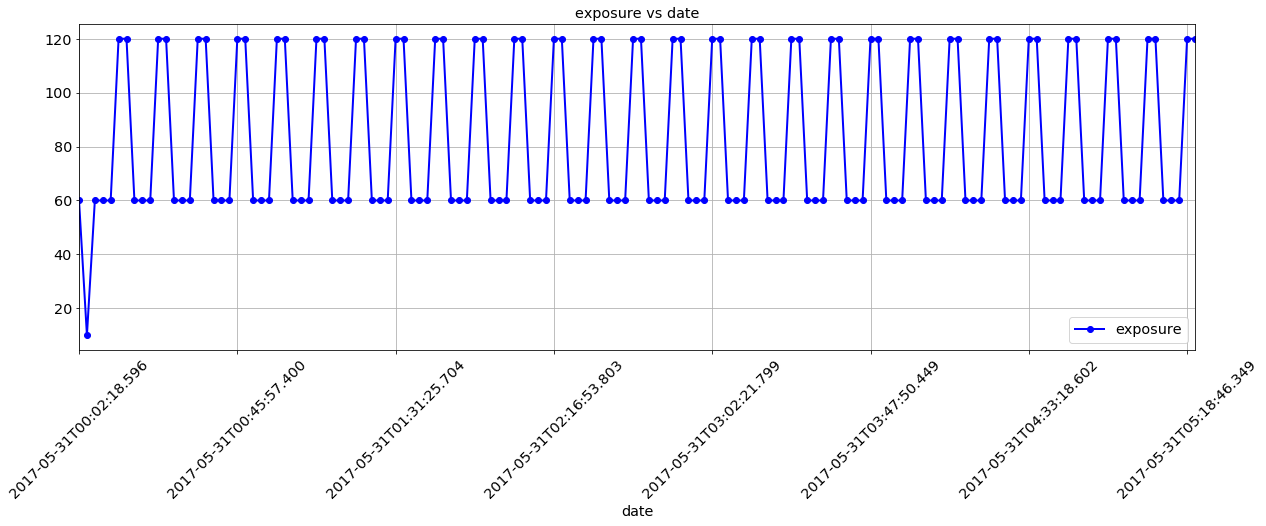

In [40]:
df.plot('date','exposure',figsize=(20,6),rot=45,grid=True,title='exposure vs date',color='b',marker='o',linewidth=2)

### Save pandas file


In [41]:
df.to_csv(pandaslogfile)